In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract

In [ ]:
import pytesseract

# Check if the module is installed
if pytesseract:
    print("pytesseract is installed successfully!")
else:
    print("pytesseract installation failed.")

pytesseract is installed successfully!


## Libraries

In [ ]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np
import re,string,unicodedata

#Tesseract Library
import pytesseract

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

#Gensim Library for Text Processing
import gensim.parsing.preprocessing as gsp
from gensim import utils

#TextBlob Library (Sentiment Analysis)
from textblob import TextBlob, Word

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#WordCloud Generator
from wordcloud import WordCloud,STOPWORDS

## Some Exploration

In [ ]:
#Define Directory Path
sample_images = '/content/drive/MyDrive/detecting sentiments dataset/sample data files'
test_images = '/content/drive/MyDrive/detecting sentiments dataset/Dataset'

In [ ]:
#Custom Function to Traverse the folder
def traverse(directory):
    path, dirs, files = next(os.walk(directory))
    fol_nm = os.path.split(os.path.dirname(path))[-1]
    print(f'Number of files found in "{fol_nm}" : ',len(files))

In [ ]:
#Traversing the folders
traverse(sample_images)
traverse(test_images)

Number of files found in "detecting sentiments dataset" :  3
Number of files found in "detecting sentiments dataset" :  10


## Extracting Text (the fun stuff !)

In [ ]:
ex_txt = []   #list to store the extracted text

#Function to Extract Text
def TxtExtract(directory):
    """
    This function will handle the core OCR processing of images.
    """

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            text = pytesseract.image_to_string(Image.open(filepath), timeout=5)
            if not text:
                ex_txt.extend([[file, "blank"]])
            else:
                ex_txt.extend([[file, text]])

    fol_nm = os.path.split(os.path.dirname(subdir))[-1]

    print(f"Text Extracted from the files in '{fol_nm}' folder & saved to list..")

In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr
!pip install Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 18s (269 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import os

os.environ['PATH'] = os.environ['PATH'] + ':/usr/local/bin/'

In [ ]:
import pytesseract
import glob

# Get a list of all the files in the directory
files = glob.glob('/content/drive/MyDrive/detecting sentiments dataset/Dataset/*.jpg')

# Iterate over the files and print the text from each image
for file in files:
    text = pytesseract.image_to_string(Image.open(file))
    print(text)

 

When people ask
what I see in you,
I just smile and
look away because
I'm afraid if they knew,
they'd fall in love
with you too.

   
 

eS

oP mce et
aie) al
Lee

LOVE
®

 

a =
Se

lesbianvenom:

lesbianvenom:

straighteners aren’t worth ur money i’ve been using one for three
weeks and i’m still definitely a lesbian

in all my 20 years of living this has been by far my best joke ever

ees MU WALLA OL

em eae ie

not living by society's
standards, but deep down,
they wish they had the
courage to do the same.

we Being Gay & Proud Quotes
www.geckoandfly.com

es

 

Irased on or was the outcome of the perception and attitudes of the audience toward &. The
majority believed that portrayal of the LGBT commundy in Indian movies was montly negative,
while the same in western movies was ponitive und precise. Even though the negative portrayal
‘ofthe LOOBT themes in Indian cinema was pointed out the improvements that have been made
were ached pod

Following «© the evidence of quote

In [ ]:
import pytesseract

print(pytesseract.image_to_string(Image.open('/content/drive/MyDrive/detecting sentiments dataset/Dataset/Test100.jpg')))

In [ ]:
#Extracting Text from JPG files in Sample Image Folder
TxtExtract(sample_images)

#Extracting Text from JPG files in Dataset Folder
TxtExtract(test_images)

Text Extracted from the files in 'detecting sentiments dataset' folder & saved to list..
Text Extracted from the files in 'detecting sentiments dataset' folder & saved to list..


In [ ]:
#Converting the list to dataframe for further analysis
ext_df = pd.DataFrame(ex_txt,columns=['FileName','Text'])

In [ ]:
#Inspect the dataframe
ext_df.head()

,FileName,Text
0,Sample_Negative.jpg,Of course gay men\n\ndress well. They didn't\n...
1,Sample_Positive.jpg,
2,Sample_Random.jpg,
3,Test100.jpg,\n
4,Test1001.jpg,"When people ask\nwhat I see in you,\nI just sm..."


In [ ]:
print("Total Records: ", ext_df.shape[0])

Total Records:  26


## Extracted Text Processing

In [ ]:
# Create list of pre-processing func (gensim)
processes = [
               gsp.strip_tags,
               gsp.strip_punctuation,
               gsp.strip_multiple_whitespaces,
               gsp.strip_numeric,
               gsp.remove_stopwords,
               gsp.strip_short,
               gsp.stem_text
            ]

# Create func to pre-process text
def proc_txt(txt):
    text = txt.lower()
    text = utils.to_unicode(text)
    for p in processes:
        text = p(text)
    return text

In [ ]:
#Creating a new column with processed text
ext_df['Text_Pr'] = ext_df['Text'].apply(lambda x: proc_txt(x))

In [ ]:
#Creating a seperate dataframe with non-blank Text
ext_df_txt = ext_df[(  ext_df['Text_Pr'] != 'blank'  )]

In [ ]:
print("Total Records in Text Only Dataframe: ", ext_df_txt.shape[0])

Total Records in Text Only Dataframe:  26


## Sentiment Analysis

In [ ]:
# Creating a function to analyse the tweet sentiments

def sentiment_analyzer(text):
    TB_sentiment_polarity = TextBlob(text).sentiment.polarity

    # decide sentiment as positive, negative and neutral
    if TB_sentiment_polarity >= 0.00 :
        return "Positive"

    elif TB_sentiment_polarity <= 0.00 :
        return "Negative"

    else :
        return "Neutral"

In [ ]:
#Analysing the sentiment
ext_df_txt['Sentiment'] = ext_df_txt['Text_Pr'].apply(lambda x: sentiment_analyzer(x))

In [ ]:
def sentiment_analyzer(text):
    TB_sentiment_polarity = TextBlob(text).sentiment.polarity

    # decide sentiment as positive, negative and neutral
    if TB_sentiment_polarity > 0.00:
        return "Positive"

    elif TB_sentiment_polarity < 0.00:
        return "Negative"

    else:
        return "Neutral"

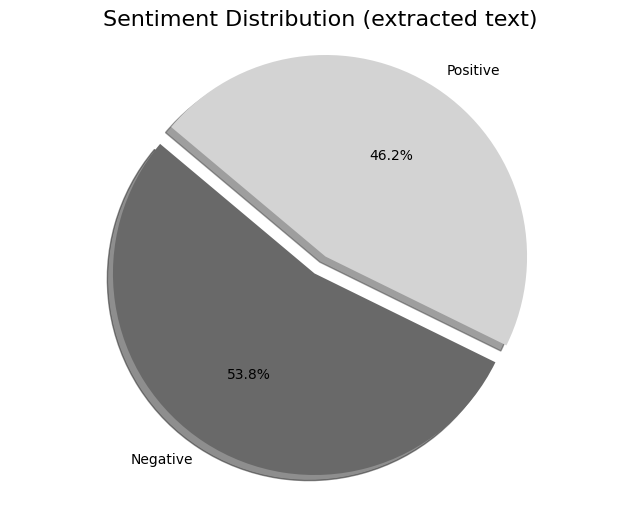

In [ ]:
sentiment_count = ext_df_txt.groupby('Sentiment').size()

# Data to plot
labels = 'Negative', 'Positive'
sizes = [sentiment_count[0], sentiment_count[1]]
colors = ['dimgrey', 'lightgray']
explode = (0.1, 0)  # explode 1st slice
fig = plt.figure(figsize=[8, 6])

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Sentiment Distribution (extracted text)", fontsize=16)
plt.show()

## Word Cloud

In [ ]:
# Function to plot word cloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,12.0),
                   title = None, title_size=18, image_color=False):

    wordcloud = WordCloud(background_color='white',
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)

    if image_color:
        #image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'center'})
    plt.axis('off');
    plt.tight_layout()


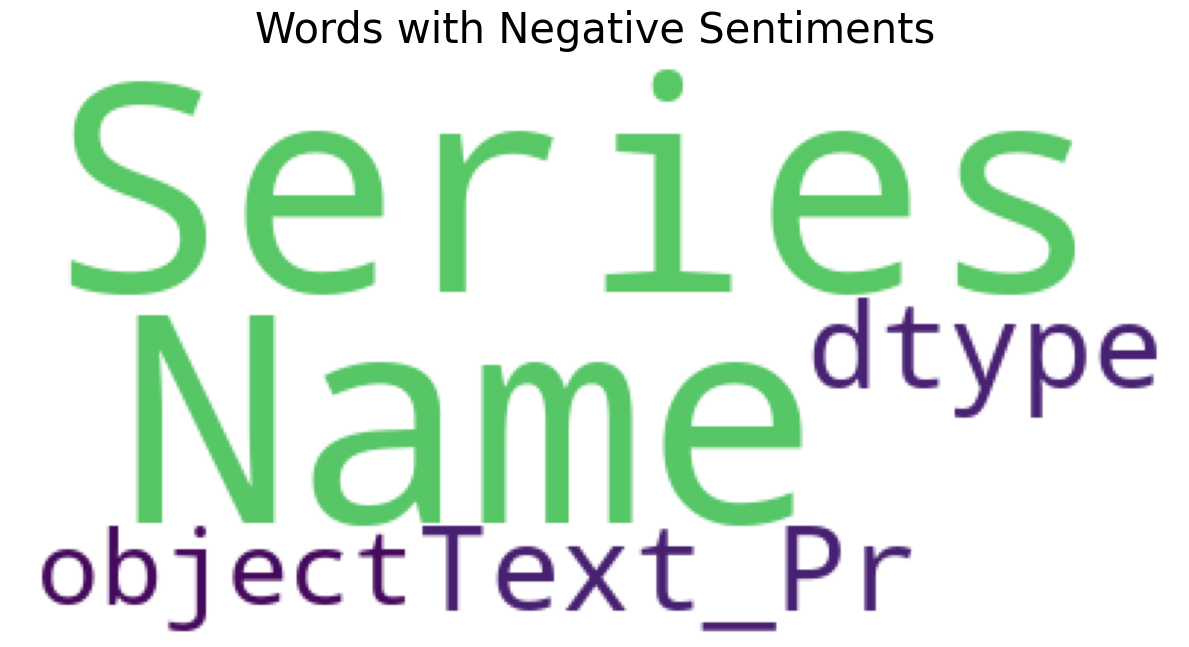

In [ ]:
txt = str( ext_df_txt[ext_df_txt['Sentiment'] == 'Negative'].Text_Pr )
plot_wordcloud(txt, max_words=200, max_font_size=100,
               title = 'Words with Negative Sentiments', title_size=30)

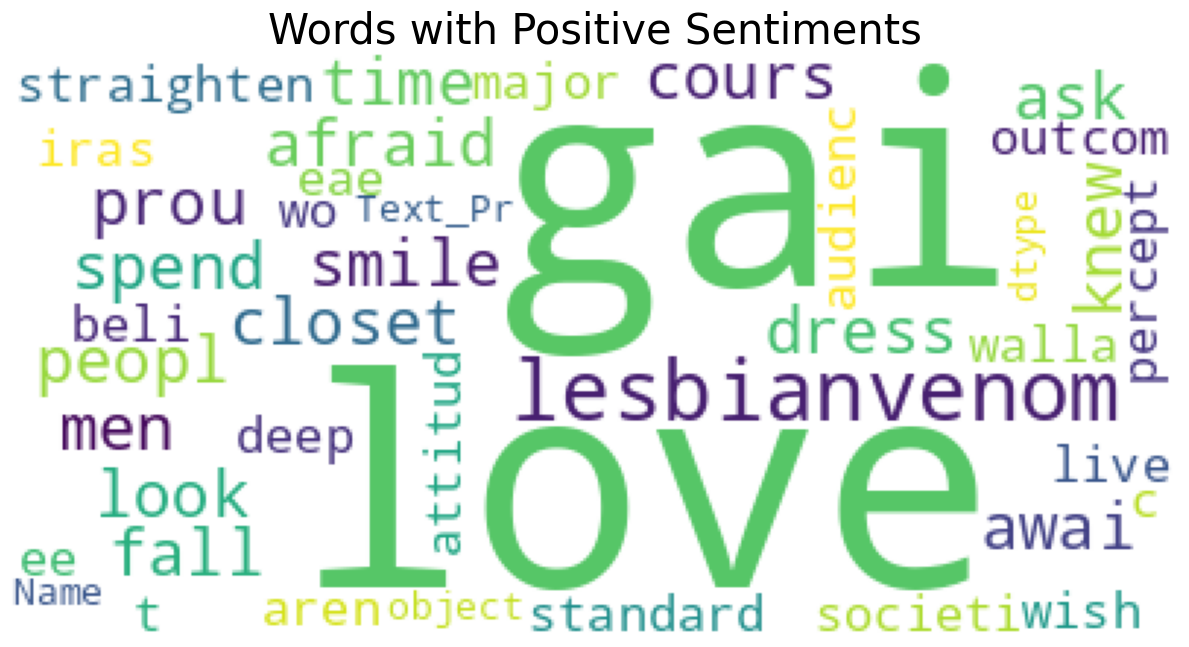

In [ ]:
txt = str( ext_df_txt[ext_df_txt['Sentiment'] == 'Positive'].Text_Pr )
plot_wordcloud(txt, max_words=200, max_font_size=100,
               title = 'Words with Positive Sentiments', title_size=30)

In [ ]:
#Free up memory
gc.collect()

8263